https://towardsdatascience.com/which-celebrity-are-you-d8c6507f21c9

# In this notebook I have trained a alread buit in model resnet 50 which is build by stanford researchor.
In this project i have trained the model with 8600 bollywood actor images and if we provide any sample image then it will tell us that from which bollywood ators our face match,And the model will show the image of that actor from which our face is match.

In [ ]:
!pip install mtcnn==0.1.0
!pip install tensorflow==2.3.1
!pip install keras==2.4.3
!pip install keras-vggface==0.6
!pip install keras_applications==1.0.8

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.3 MB 5.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320.4 MB 27 kB/s 
     |████████████████████████████████| 459 kB 57.0 MB/s 
     |████████████████████████████████| 2.9 MB 43.7 MB/s 
     |████████████████████████████████| 20.1 MB 1.2 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempti

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 3.2 MB/s 


In [ ]:
from tensorflow.keras.preprocessing import image
from keras_vggface.utils import preprocess_input
from keras_vggface.vggface import VGGFace
import numpy as np
import pickle
from tqdm import tqdm

In [ ]:
data = '/content/drive/MyDrive/Colab Notebooks/bollywood celebrity/Bollywood_celeb_face_localized'

In [ ]:
import os

In [ ]:
actors = os.listdir('/content/drive/MyDrive/Colab Notebooks/bollywood celebrity/which bollywood celebritty are you/Bollywood_celeb_face_localized')

In [ ]:
actors

['Vaani_Kapoor',
 'Zareen_Khan',
 'Yami_Gautam',
 'Vidya_Balan',
 'Tiger_Shroff',
 'Uday_Chopra',
 'Varun_Dhawan',
 'Tusshar_Kapoor',
 'Vivek_Oberoi',
 'Vicky_Kaushal',
 'Sushant_Singh_Rajput',
 'Sidharth_Malhotra',
 'Taapsee_Pannu',
 'Tamannaah_Bhatia',
 'Shruti_Haasan',
 'Sonam_Kapoor',
 'Sonakshi_Sinha',
 'Tabu',
 'Sunny_Deol',
 'Suniel_Shetty',
 'Shah_Rukh_Khan',
 'Shahid_Kapoor',
 'Sanjay_Dutt',
 'Shreyas_Talpade',
 'Sara_Ali_Khan',
 'Shilpa_Shetty',
 'Salman_Khan',
 'Shraddha_Kapoor',
 'R_Madhavan',
 'Saif_Ali_Khan',
 'Ranbir_Kapoor',
 'Priyanka_Chopra',
 'Rajkummar_Rao',
 'Prachi_Desai',
 'Riteish_Deshmukh',
 'Richa_Chadda',
 'Preity_Zinta',
 'Ranveer_Singh',
 'Randeep_Hooda',
 'Rani_Mukerji',
 'Parineeti_Chopra',
 'Mrunal_Thakur',
 'Manoj_Bajpayee',
 'Paresh_Rawal',
 'Nargis_Fakhri',
 'Nana_Patekar',
 'Prabhas',
 'Nushrat_Bharucha',
 'Pooja_Hegde',
 'Naseeruddin_Shah',
 'Kartik_Aaryan',
 'Kareena_Kapoor',
 'Kunal_Khemu',
 'Kriti_Sanon',
 'Madhuri_Dixit',
 'Karisma_Kapoor',
 'Ki

In [ ]:
filenames = []

In [ ]:
for actor in actors:
    for file in os.listdir(os.path.join('/content/drive/MyDrive/Colab Notebooks/bollywood celebrity/which bollywood celebritty are you/Bollywood_celeb_face_localized',actor)):
        filenames.append(os.path.join('/content/drive/MyDrive/Colab Notebooks/bollywood celebrity/which bollywood celebritty are you/Bollywood_celeb_face_localized',actor,file))

In [ ]:
filenames

['/content/drive/MyDrive/Colab Notebooks/bollywood celebrity/which bollywood celebritty are you/Bollywood_celeb_face_localized/Vaani_Kapoor/Vaani_Kapoor.150.jpg',
 '/content/drive/MyDrive/Colab Notebooks/bollywood celebrity/which bollywood celebritty are you/Bollywood_celeb_face_localized/Vaani_Kapoor/Vaani_Kapoor.171.jpg',
 '/content/drive/MyDrive/Colab Notebooks/bollywood celebrity/which bollywood celebritty are you/Bollywood_celeb_face_localized/Vaani_Kapoor/Vaani_Kapoor.147.jpg',
 '/content/drive/MyDrive/Colab Notebooks/bollywood celebrity/which bollywood celebritty are you/Bollywood_celeb_face_localized/Vaani_Kapoor/Vaani_Kapoor.106.jpg',
 '/content/drive/MyDrive/Colab Notebooks/bollywood celebrity/which bollywood celebritty are you/Bollywood_celeb_face_localized/Vaani_Kapoor/Vaani_Kapoor.108.jpg',
 '/content/drive/MyDrive/Colab Notebooks/bollywood celebrity/which bollywood celebritty are you/Bollywood_celeb_face_localized/Vaani_Kapoor/Vaani_Kapoor.127.jpg',
 '/content/drive/MyDri

In [ ]:
len(filenames)

8664

In [ ]:
from keras.utils.layer_utils import get_source_inputs

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
from keras_vggface.utils import preprocess_input

In [ ]:
from keras_vggface.vggface import VGGFace

In [ ]:
import numpy as np
from tqdm import tqdm


In [ ]:
model = VGGFace(model='resnet50',include_top=False,input_shape=(224,224,3),pooling='avg')

94699520/94694792 [==============================] - 3s 0us/step


In [ ]:
model.summary()

Model: "vggface_resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1/7x7_s2 (Conv2D)           (None, 112, 112, 64) 9408        input_1[0][0]                    
__________________________________________________________________________________________________
conv1/7x7_s2/bn (BatchNormaliza (None, 112, 112, 64) 256         conv1/7x7_s2[0][0]               
__________________________________________________________________________________________________
activation (Activation)         (None, 112, 112, 64) 0           conv1/7x7_s2/bn[0][0]            
___________________________________________________________________________________

In [ ]:
def feature_extractor(img_path,model):
    img = image.load_img(img_path,target_size=(224,224))
    img_array = image.img_to_array(img)
    expanded_img = np.expand_dims(img_array,axis=0)
    preprocessed_img = preprocess_input(expanded_img)

    result = model.predict(preprocessed_img).flatten()

    return result

In [ ]:
features = []



In [ ]:
for file in tqdm(filenames):
    features.append(feature_extractor(file,model))

100%|██████████| 8664/8664 [1:12:01<00:00,  2.00it/s]


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import cv2
from mtcnn import MTCNN
from PIL import Image

In [ ]:
type(features)

list

In [ ]:
features = np.array(features)

In [ ]:
type(features)

numpy.ndarray

In [ ]:
features

array([[0.0000000e+00, 0.0000000e+00, 4.9033155e+00, ..., 3.7623355e-01,
        0.0000000e+00, 9.8078316e-01],
       [8.2901132e-01, 0.0000000e+00, 2.1871902e-02, ..., 5.4676733e+00,
        1.2295455e+00, 3.6421657e-01],
       [0.0000000e+00, 0.0000000e+00, 6.0905550e-02, ..., 5.1509384e-03,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [3.7358370e-02, 9.2549187e-01, 0.0000000e+00, ..., 1.4451133e+00,
        0.0000000e+00, 4.5386014e+00],
       [4.8258591e+00, 1.8145359e+00, 0.0000000e+00, ..., 0.0000000e+00,
        2.1104898e-01, 8.4421139e+00],
       [5.4478860e+00, 2.3878300e-01, 0.0000000e+00, ..., 0.0000000e+00,
        2.9173773e-03, 7.4613481e+00]], dtype=float32)

In [ ]:
features.shape

(8664, 2048)

In [ ]:
detector = MTCNN()

In [ ]:
sample_img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/bollywood celebrity/Sample/ff04e04d-41d8-4b23-b8bc-8cd73102f57d.jpeg')

In [ ]:
results = detector.detect_faces(sample_img)

In [ ]:
x,y,width,height = results[0]['box']

In [ ]:
face = sample_img[y:y+height,x:x+width]

In [ ]:
from google.colab.patches import cv2_imshow

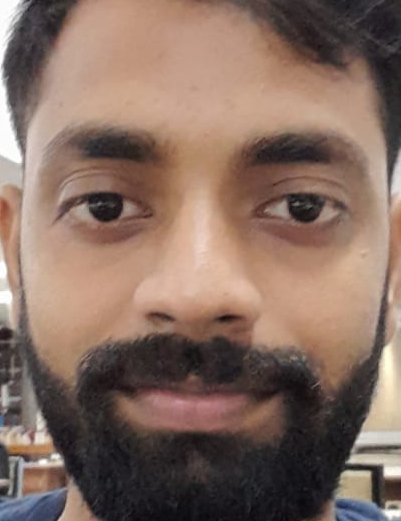

-1

In [ ]:
# we can see selected face from sample 
cv2_imshow(face)
cv2.waitKey(0)

In [ ]:
#  extract its features
image = Image.fromarray(face)

In [ ]:
image = image.resize((224,224))

In [ ]:
face_array = np.asarray(image)

In [ ]:
face_array = face_array.astype('float32')

In [ ]:
expanded_img = np.expand_dims(face_array,axis=0)

In [ ]:
preprocessed_img = preprocess_input(expanded_img)

In [ ]:
result = model.predict(preprocessed_img).flatten()

In [ ]:
print(result)
print(result.shape)

[0.         4.7360406  2.1095889  ... 0.         0.02599932 0.20756797]
(2048,)


In [ ]:
#Now we will compare result with features

In [ ]:
similarity = []


In [ ]:
for i in range(len(features)):
    similarity.append(cosine_similarity(result.reshape(1,-1),features[i].reshape(1,-1))[0][0])

In [ ]:
print(len(similarity))

8664


In [ ]:
similarity

[0.26987496,
 0.2811625,
 0.33180207,
 0.31516874,
 0.29558027,
 0.2894905,
 0.338593,
 0.34363127,
 0.27861825,
 0.28450173,
 0.30334502,
 0.29649857,
 0.30027866,
 0.31977737,
 0.3095219,
 0.3057553,
 0.28169405,
 0.321918,
 0.25768286,
 0.31639722,
 0.13709873,
 0.30872953,
 0.31457853,
 0.29730117,
 0.2699138,
 0.24650568,
 0.2639248,
 0.28775695,
 0.2736662,
 0.29603645,
 0.27881593,
 0.31779355,
 0.31150216,
 0.3342206,
 0.28428036,
 0.29019743,
 0.29185107,
 0.28153923,
 0.28927353,
 0.3052203,
 0.30808812,
 0.2824354,
 0.2943875,
 0.3137638,
 0.29024497,
 0.30093926,
 0.29143935,
 0.31215626,
 0.33117467,
 0.29706514,
 0.29269558,
 0.28610846,
 0.27862114,
 0.22986639,
 0.24553971,
 0.28364876,
 0.3174936,
 0.295065,
 0.30070463,
 0.30309582,
 0.27791566,
 0.29864344,
 0.2785973,
 0.33461392,
 0.2964127,
 0.30378577,
 0.30227244,
 0.28168193,
 0.24130844,
 0.25200593,
 0.30040967,
 0.3071537,
 0.33241054,
 0.28728494,
 0.29021245,
 0.27179927,
 0.31979918,
 0.2873727,
 0.294245

Basically these are the similarity index of sample image with all 8600 images.

In [ ]:
index_pos = sorted(list(enumerate(similarity)),reverse=True,key=lambda x:x[1])[0][0]

In [ ]:
#This will return index of most similar image
index_pos

5081

In [ ]:
from google.colab.patches import cv2_imshow

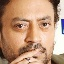

-1

In [ ]:
temp_img = cv2.imread(filenames[index_pos])
cv2_imshow(temp_img)
cv2.waitKey(0)